# Correlation

After feature extraction and removal of corrupt data points there are 1447 records and 128 features. Early model building showed weak performance. We will use correlation matrix to reduce the number of features.

In [2]:
#libraries
import pickle
import numpy as np
import pandas as pd
import time
import os
from feature_utils import *
import matplotlib.pyplot as plt
%matplotlib inline

#functions
def picklereader(fpath):
    with open(fpath,'rb') as f:
        content = pd.read_pickle(f)
    return content

df = picklereader(os.getcwd()+'/data/df18S_rs_extract.p')

#helpful scripts
#Save extracted data to file
#with open('data/df18S_rs_extract.p',"wb") as f:
#    pickle.dump(df, f)

#summarize panda data frame
#exceed cell width limit in notebook
#pd.options.display.max_columns = None
# df.describe()

In [2]:
#removed corrupted records
df = df[df.PID != 'F0871']
df = df[df.PID != 'F1481']

In [3]:
df.shape

(1447, 128)

(array([   3.,    3.,    3.,    1.,    4.,    5.,   13.,   25.,   28.,
          41.,   63.,  108.,   98.,  162.,  196.,  217.,  182.,  167.,
         102.,   26.]),
 array([ 0.39  ,  0.4205,  0.451 ,  0.4815,  0.512 ,  0.5425,  0.573 ,
         0.6035,  0.634 ,  0.6645,  0.695 ,  0.7255,  0.756 ,  0.7865,
         0.817 ,  0.8475,  0.878 ,  0.9085,  0.939 ,  0.9695,  1.    ]),
 <a list of 20 Patch objects>)

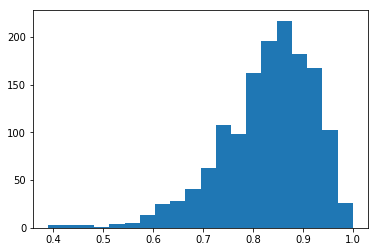

In [5]:
plt.hist(df['ffr'],bins=20)

The distribution of fractional flow reserve is left skewed. A majority of the records are below 0.8 the positive class threshold. 

{'boxes': [<matplotlib.lines.Line2D at 0x11570c240>],
 'caps': [<matplotlib.lines.Line2D at 0x11570cd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x115719ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115719668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11570c470>,
  <matplotlib.lines.Line2D at 0x11570c908>]}

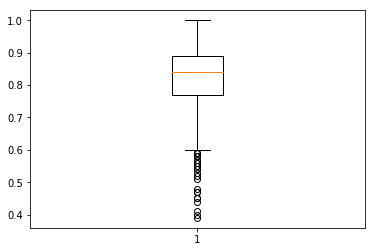

In [6]:
plt.boxplot(df['ffr'])

In [8]:
df['ffr'].describe()

count    1447.000000
mean        0.826469
std         0.092298
min         0.390000
25%         0.770000
50%         0.840000
75%         0.890000
max         1.000000
Name: ffr, dtype: float64

The mean is 0.82 with a standard deviation of +/- 0.09. 

(array([   3.,    1.,    7.,    9.,   25.,   37.,   70.,   84.,  119.,
          80.,  160.,  166.,  158.,  179.,  146.,   86.,   69.,   27.,
          18.,    3.]),
 array([ 29. ,  31.9,  34.8,  37.7,  40.6,  43.5,  46.4,  49.3,  52.2,
         55.1,  58. ,  60.9,  63.8,  66.7,  69.6,  72.5,  75.4,  78.3,
         81.2,  84.1,  87. ]),
 <a list of 20 Patch objects>)

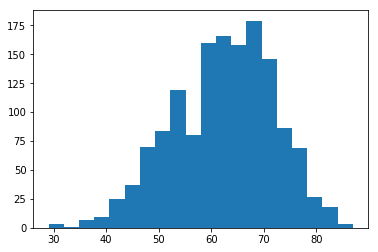

In [12]:
plt.hist(df['age'],bins=20)

/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


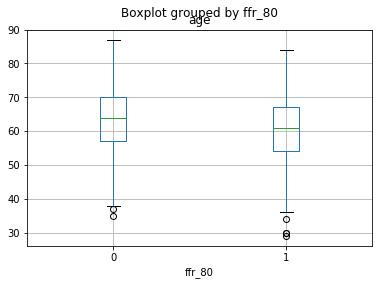

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df.boxplot(column=['age'], by='ffr_80')

The distribution of age is uniform with an equal amount of both positive and negative classes across all age groups.

(array([ 1035.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,   412.]),
 array([ 1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,
         1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,
         1.9 ,  1.95,  2.  ]),
 <a list of 20 Patch objects>)

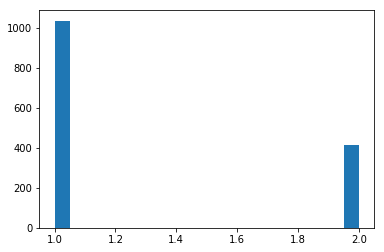

In [13]:
plt.hist(df['gender'],bins=20)

/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


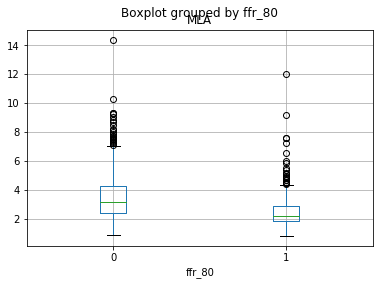

In [17]:
df.boxplot(column=['MLA'], by='ffr_80')

/Users/paulnguyen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


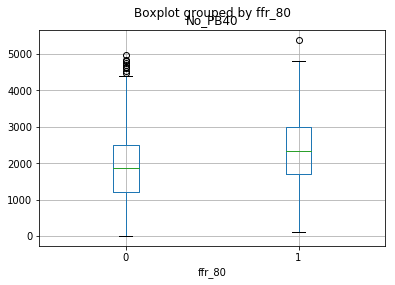

In [24]:

df.boxplot(column=['No_PB40'], by='ffr_80')

(array([ 944.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  503.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

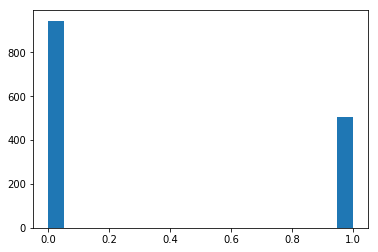

In [14]:
plt.hist(df['ffr_80'],bins=20)

# Correlation Matrix

In [15]:
col = ['PID','n_frame','OS','distal','sx0','sz','ffr','ffr_80','lu','pl','luA','plA','pb','luAc','plAc','len_PB40','len_PB70']
dfdrop = df.drop(col, axis=1)

In [16]:
dfcorr = dfdrop.corr()
dfcorr1 = dfcorr.mask(~np.tril(np.ones(dfcorr.shape)).astype(np.bool))
dfcorr2 = dfcorr1.unstack()
dfcorr3 = dfcorr2[dfcorr2[:] != 1].sort_values(ascending=False)
dfcorr4 = dfcorr3[~np.isnan(dfcorr3)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 6})
sns.heatmap(dfcorr1, 
        xticklabels=dfcorr.columns,
        yticklabels=dfcorr.columns)
plt.savefig('dfcorr.pdf')
#plt.show()

There are white lines in the matrix suggesting high correlation. The features are No_lumen25_prox and No_lumen25_prox5. Looking at these features more closely they are all zero values. In this particular feature there are no proximal region with a lumen area less than 2.5mm2.

In [19]:
dfdrop = dfdrop.drop('No_lumen25_prox', axis=1)
dfdrop = dfdrop.drop('No_lumen25_prox5', axis=1)

In [ ]:
dfcorr = dfdrop.corr()
dfcorr1 = dfcorr.mask(~np.tril(np.ones(dfcorr.shape)).astype(np.bool))
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 6})
sns.heatmap(dfcorr1, 
        xticklabels=dfcorr.columns,
        yticklabels=dfcorr.columns)
plt.savefig('dfcorr.pdf')
#plt.show()

In [21]:
corr_matrix = dfdrop.corr().abs()
upper = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_reduce = dfdrop.drop(to_drop, axis=1)
df_reduce.shape

(1447, 65)

Our reduced data is down from 128 features to 65 after removing non-features and correlations > 0.95.

In [23]:
#Save reduced data to file
#with open('data/df18S_rs_reduce.p',"wb") as f:
#    pickle.dump(df_reduce, f)

In [ ]:
dfcorr = df_reduce.corr()
dfcorr1 = dfcorr.mask(~np.tril(np.ones(dfcorr.shape)).astype(np.bool))
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 6})
sns.heatmap(dfcorr1, 
        xticklabels=dfcorr.columns,
        yticklabels=dfcorr.columns)
plt.savefig('dfcorr_reduce.pdf')
#plt.show()

# Conclusion

I considered using PCA to reduce the number of features but the models did not perform any better. It is possible that initial smoothing of lumen area and plaque area generalized the data enough where the PCA only furthered generalized the data. In this analysis I ended up using correlation matrix with a threshold of 0.9 to reduce the features from 128 to 65.